In [106]:
# Import necessary libraries
import pandas as pd
import numpy as np


In [107]:
import os

# Display the current working directory
print("Current working directory:", os.getcwd())


Current working directory: /Users/tampham/Desktop


In [108]:

# Set working directory to Desktop 
os.chdir('/Users/tampham/Desktop')

# Verify the current working directory
print("Current working directory:", os.getcwd())

Current working directory: /Users/tampham/Desktop


In [109]:
import pandas as pd
# Load the Excel file
data = pd.read_excel('2020-2024-education-in-danger-incident-data.xlsx')

In [110]:
# Display the first few rows
data.head()

,Date,Event Description,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Location of event,Reported Perpetrator,...,Educators Arrested,Known Educators Kidnap Or Arrest Outcome,Students Attacked in School,Students Killed,Students Injured,Students Kidnapped,Known Student Kidnap Or Arrest Outcome,Students Arrested,Sexual Violence Affecting School Age Children,SiND Event ID
0,2024-09-15,Reported in September 2024: An unspecified num...,Lebanon,LBN,No Information,NaN,NaN,censored by HDX,Education Building,Foreign Forces - Military,...,0,NaN,0,0,0,0,NaN,0,0,84350
1,2024-08-29,August 2024: A teacher coordinator of an indig...,Colombia,COL,RAP Pacífico,2.800844,-76.550096,(2) 25 km Precision,Other,No Information,...,0,NaN,0,0,0,0,NaN,0,0,77196
2,2024-08-28,"28 August 2024: Nine Palestinians, including t...",OPT,PSE,Gaza Strip,NaN,NaN,censored,Education Building,Host Government: Military,...,0,NaN,10,0,0,0,NaN,0,0,73789
3,2024-08-27,August 2024: A soldier was killed and three pe...,Myanmar,MMR,Sagaing Region,22.953189,94.444283,(2) 25 km Precision,Education Building,Other,...,0,NaN,3,0,0,0,NaN,0,0,76165
4,2024-08-27,August 2024: A high school was damaged in an a...,Myanmar,MMR,Shan State,22.543690,97.035720,"(3) District, Communicipality or Commune",Education Building,Other,...,0,NaN,0,0,0,0,NaN,0,0,73888


In [111]:
# Get basic statistics for numerical columns
print(data.describe())


                                Date     Latitude    Longitude  \
count                           3471  3102.000000  3102.000000   
mean   2022-09-10 08:02:54.243733760    21.795107    43.787314   
min              2020-01-01 00:00:00   -38.627600  -120.802436   
25%              2021-06-25 12:00:00    12.362155    23.345603   
50%              2022-11-08 00:00:00    20.160643    37.259100   
75%              2023-12-04 00:00:00    34.431824    94.029702   
max              2024-09-15 00:00:00    56.868527   144.149900   
std                              NaN    16.053950    45.381093   

       Attacks on Schools  Attacks on Universities  \
count         3471.000000              3471.000000   
mean             0.572746                 0.082685   
min              0.000000                 0.000000   
25%              0.000000                 0.000000   
50%              1.000000                 0.000000   
75%              1.000000                 0.000000   
max              1.000000  

In [112]:
# Check for missing values
print(data.isnull().sum())


Date                                                0
Event Description                                   0
Country                                             0
Country ISO                                         0
Admin 1                                             2
Latitude                                          369
Longitude                                         369
Geo Precision                                       0
Location of event                                   1
Reported Perpetrator                                0
Reported Perpetrator Name                           0
Weapon Carried/Used                                 0
Type of education facility                          0
Attacks on Schools                                  0
Attacks on Universities                             0
Military Occupation of Education facility           0
Arson attack on education facility                  0
Forced Entry into education facility                0
Damage/Destruction To Ed fac

In [113]:
# Fill missing value in Admin column with unknown
data['Admin 1'] = data['Admin 1'].fillna('Unknown')
# Verify if there is any missing value
missing_admin1 = data['Admin 1'].isnull().sum()
print(f"Remaining missing values in 'Admin 1': {missing_admin1}")

Remaining missing values in 'Admin 1': 0


In [114]:
# Fill missing values with 0
data['Latitude'] = data['Latitude'].fillna(0)
data['Longitude'] = data['Longitude'].fillna(0)

# Verify missing values are handled
print("Missing values in Latitude:", data['Latitude'].isnull().sum())
print("Missing values in Longitude:", data['Longitude'].isnull().sum())

Missing values in Latitude: 0
Missing values in Longitude: 0


In [115]:
print(data['Known Educators Kidnap Or Arrest Outcome'].head(20))  # View first 20 rows


0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11    NoInformation
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
Name: Known Educators Kidnap Or Arrest Outcome, dtype: object


In [116]:
# Drop two columns
data = data.drop(columns=['Known Educators Kidnap Or Arrest Outcome', 'Known Student Kidnap Or Arrest Outcome'])

# Verify the columns are removed
print(data.columns)




Index(['Date', 'Event Description', 'Country', 'Country ISO', 'Admin 1',
       'Latitude', 'Longitude', 'Geo Precision', 'Location of event',
       'Reported Perpetrator', 'Reported Perpetrator Name',
       'Weapon Carried/Used', 'Type of education facility',
       'Attacks on Schools', 'Attacks on Universities',
       'Military Occupation of Education facility',
       'Arson attack on education facility',
       'Forced Entry into education facility',
       'Damage/Destruction To Ed facility Event',
       'Attacks on Students and Teachers', 'Educators Killed',
       'Educators Injured', 'Educators Kidnapped', 'Educators Arrested',
       'Students Attacked in School', 'Students Killed', 'Students Injured',
       'Students Kidnapped', 'Students Arrested',
       'Sexual Violence Affecting School Age Children', 'SiND Event ID'],
      dtype='object')


In [117]:
# Count null values in each column
null_counts = data.isnull().sum()
print(null_counts)



Date                                             0
Event Description                                0
Country                                          0
Country ISO                                      0
Admin 1                                          0
Latitude                                         0
Longitude                                        0
Geo Precision                                    0
Location of event                                1
Reported Perpetrator                             0
Reported Perpetrator Name                        0
Weapon Carried/Used                              0
Type of education facility                       0
Attacks on Schools                               0
Attacks on Universities                          0
Military Occupation of Education facility        0
Arson attack on education facility               0
Forced Entry into education facility             0
Damage/Destruction To Ed facility Event          0
Attacks on Students and Teacher

In [131]:
# Fill missing value in Location of Event column with None
data['Location of event'] = data['Location of event'].fillna('None')

In [133]:
# Count null values in each column
null_counts = data.isnull().sum()
print(null_counts)


Date                                             0
Event Description                                0
Country                                          0
Country ISO                                      0
Admin 1                                          0
Latitude                                         0
Longitude                                        0
Geo Precision                                    0
Location of event                                0
Reported Perpetrator                             0
Reported Perpetrator Name                        0
Weapon Carried/Used                              0
Type of education facility                       0
Attacks on Schools                               0
Attacks on Universities                          0
Military Occupation of Education facility        0
Arson attack on education facility               0
Forced Entry into education facility             0
Damage/Destruction To Ed facility Event          0
Attacks on Students and Teacher

In [135]:
# Check for duplicate rows
duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [137]:
# Display current data types
print(data.dtypes)


Date                                             datetime64[ns]
Event Description                                        object
Country                                                  object
Country ISO                                              object
Admin 1                                                  object
Latitude                                                float64
Longitude                                               float64
Geo Precision                                            object
Location of event                                        object
Reported Perpetrator                                     object
Reported Perpetrator Name                                object
Weapon Carried/Used                                      object
Type of education facility                               object
Attacks on Schools                                        int64
Attacks on Universities                                   int64
Military Occupation of Education facilit

In [139]:
# Save the cleaned dataset as a CSV file in the current working directory
data.to_csv('cleaned_education_in_danger.csv', index=False)

print("clean data saved")


clean data saved


Date
2020    1011
2021    1380
2022    1152
2023    1911
2024    2282
Name: Students Attacked in School, dtype: int64


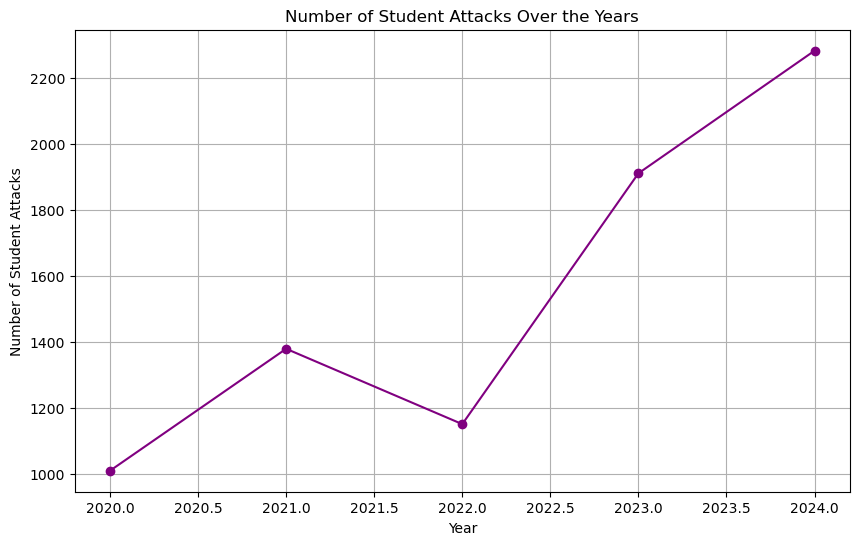

In [143]:
import matplotlib.pyplot as plt

# Group by Year and sum the number of student attacks
student_attacks_per_year = data.groupby(data['Date'].dt.year)['Students Attacked in School'].sum()

# Display the result
print(student_attacks_per_year)

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(student_attacks_per_year.index, student_attacks_per_year.values, marker='o', color='purple')
plt.title('Number of Student Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Student Attacks')
plt.grid(True)
plt.show()


In [145]:
# Summary statistics for 'Students Attacked in School'
student_attack_summary = data['Students Attacked in School'].describe()

# Print the summary statistics
print(student_attack_summary)


count    3471.000000
mean        2.228753
std        13.206172
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       347.000000
Name: Students Attacked in School, dtype: float64


In [170]:
# Find the maximum number of student attacks
max_attacks = data['Students Attacked in School'].max()

# Locate the country (or countries) with the maximum student attacks with longitude and latitude, date
country_with_max_attacks = data[data['Students Attacked in School'] == max_attacks][['Date','Country','Admin 1','Latitude','Longitude','Students Attacked in School']]

# Display the result
print(country_with_max_attacks)


           Date  Country  Admin 1  Latitude  Longitude  \
3045 2020-12-11  Nigeria  Katsina   11.9313     7.4138   

      Students Attacked in School  
3045                          347  


In [159]:
# Get the top 5 countries with the highest number of incidents
top_5_countries = data['Country'].value_counts().head(5)

# Display the results
print("Top 5 countries with the highest number of education-related incidents:")
print(top_5_countries)


Top 5 countries with the highest number of education-related incidents:
Country
Myanmar    800
Ukraine    437
OPT        360
Syria      179
Nigeria    172
Name: count, dtype: int64


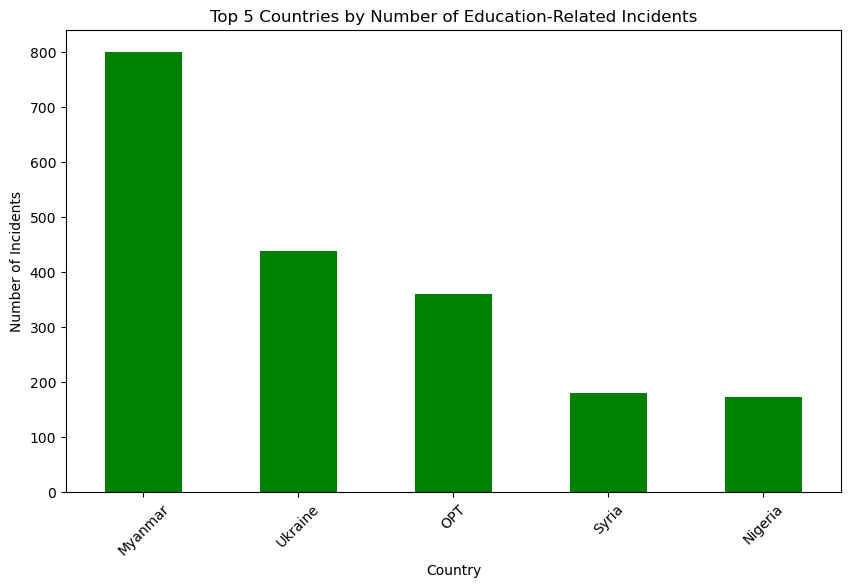

In [165]:
import matplotlib.pyplot as plt

# Plot a bar chart for the top 5 countries
top_5_countries.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 5 Countries by Number of Education-Related Incidents')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


In [174]:
data.to_excel('cleaned_education_in_danger.xlsx', index=False)

print("Cleaned data saved as an Excel file")


Cleaned data saved as an Excel file


In [178]:
data

,Date,Event Description,Country,Country ISO,Admin 1,Latitude,Longitude,Geo Precision,Location of event,Reported Perpetrator,...,Educators Kidnapped,Educators Arrested,Students Attacked in School,Students Killed,Students Injured,Students Kidnapped,Students Arrested,Sexual Violence Affecting School Age Children,SiND Event ID,Year
0,2024-09-15,Reported in September 2024: An unspecified num...,Lebanon,LBN,No Information,0.000000,0.000000,censored by HDX,Education Building,Foreign Forces - Military,...,0,0,0,0,0,0,0,0,84350,2024
1,2024-08-29,August 2024: A teacher coordinator of an indig...,Colombia,COL,RAP Pacífico,2.800844,-76.550096,(2) 25 km Precision,Other,No Information,...,0,0,0,0,0,0,0,0,77196,2024
2,2024-08-28,"28 August 2024: Nine Palestinians, including t...",OPT,PSE,Gaza Strip,0.000000,0.000000,censored,Education Building,Host Government: Military,...,0,0,10,0,0,0,0,0,73789,2024
3,2024-08-27,August 2024: A soldier was killed and three pe...,Myanmar,MMR,Sagaing Region,22.953189,94.444283,(2) 25 km Precision,Education Building,Other,...,0,0,3,0,0,0,0,0,76165,2024
4,2024-08-27,August 2024: A high school was damaged in an a...,Myanmar,MMR,Shan State,22.543690,97.035720,"(3) District, Communicipality or Commune",Education Building,Other,...,0,0,0,0,0,0,0,0,73888,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,2020-01-05,January 2020: A school was damaged by missiles...,Syria,SYR,Idlib Governorate,35.882931,36.626157,"(4) Province, State, Governorate",Education Building,Other,...,0,0,0,0,0,0,0,0,24953,2020
3467,2020-01-05,January 2020: A university student and CNL sup...,Burundi,BDI,Bujumbura Rural Province,-3.475982,29.453570,"(4) Province, State, Governorate",Education Building,NSA,...,0,0,0,0,1,0,1,0,25193,2020
3468,2020-01-03,January 2020: A school was damaged and childre...,Libya,LBY,Tripoli,32.841736,13.185799,(2) 25 km Precision,Education Building,NSA,...,0,0,2,0,1,0,0,0,24925,2020
3469,2020-01-01,January 2020: A school director was assassinat...,Mali,MLI,Mopti,14.170100,-2.097000,(2) 25 km Precision,Unspecified Location,NSA,...,0,0,0,0,0,0,0,0,24799,2020


In [193]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Ensure necessary NLTK resources are downloaded
nltk.download('vader_lexicon')

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# apply sentiment analysis - polarity scores
def analyze_sentiment_nltk(text: str) -> tuple[str, float]:
    scores = sia.polarity_scores(text)
    sentiment = 'Positive' if scores['compound'] > 0 else ('Negative' if scores['compound'] < 0 else 'Neutral')
    return sentiment, scores['compound']

# Apply sentiment analysis to the dataset
data[['Sentiment_Category', 'Sentiment_Score']] = data['Event Description'].apply(
    lambda x: pd.Series(analyze_sentiment_nltk(str(x)))
)

# Summarize sentiment categories
sentiment_summary = data['Sentiment_Category'].value_counts()

# Display sentiment summary
print("Sentiment Analysis Summary:")
print(sentiment_summary)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tampham/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment Analysis Summary:
Sentiment_Category
Negative    2826
Neutral      531
Positive     114
Name: count, dtype: int64


In [215]:
# Select only the 'Event Description' and 'Sentiment_Score' columns
result = data[['Event Description', 'Sentiment_Score']]

# Display the result
print("Event Description and Sentiment Score:")
print(result)

Event Description and Sentiment Score:
                                      Event Description  Sentiment_Score
0     Reported in September 2024: An unspecified num...           0.0772
1     August 2024: A teacher coordinator of an indig...          -0.8860
2     28 August 2024: Nine Palestinians, including t...          -0.7845
3     August 2024: A soldier was killed and three pe...          -0.8779
4     August 2024: A high school was damaged in an a...          -0.7184
...                                                 ...              ...
3466  January 2020: A school was damaged by missiles...          -0.7579
3467  January 2020: A university student and CNL sup...          -0.5267
3468  January 2020: A school was damaged and childre...          -0.6808
3469  January 2020: A school director was assassinat...           0.0000
3470  January 2020: A teacher and six students were ...          -0.6705

[3471 rows x 2 columns]


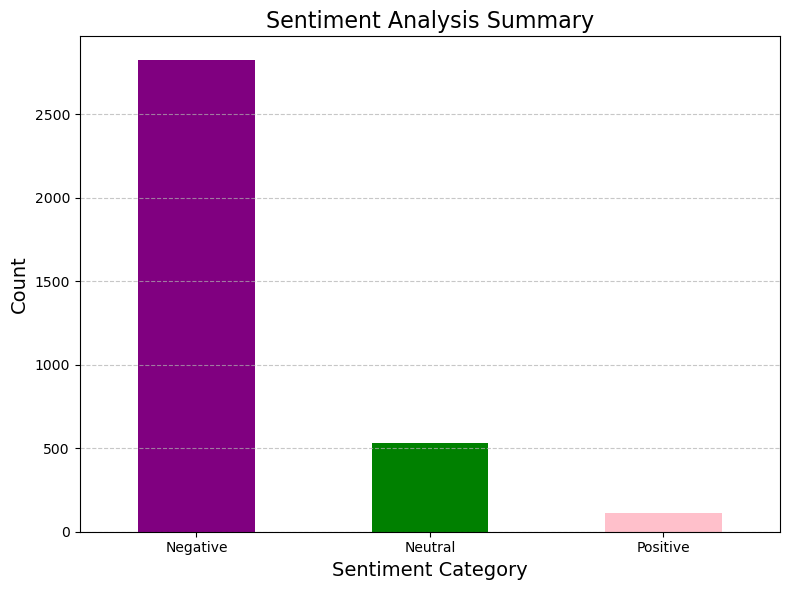

In [219]:
# Visualization with different colors for sentiment categories
plt.figure(figsize=(8, 6))
colors = ['purple', 'green', 'pink']  # Define colors for Positive, Neutral, and Negative
sentiment_summary.plot(kind='bar', rot=0, color=colors)  # Assign colors to the bars
plt.title('Sentiment Analysis Summary', fontsize=16)  # Add title
plt.xlabel('Sentiment Category', fontsize=14)  # Label x-axis
plt.ylabel('Count', fontsize=14)  # Label y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()

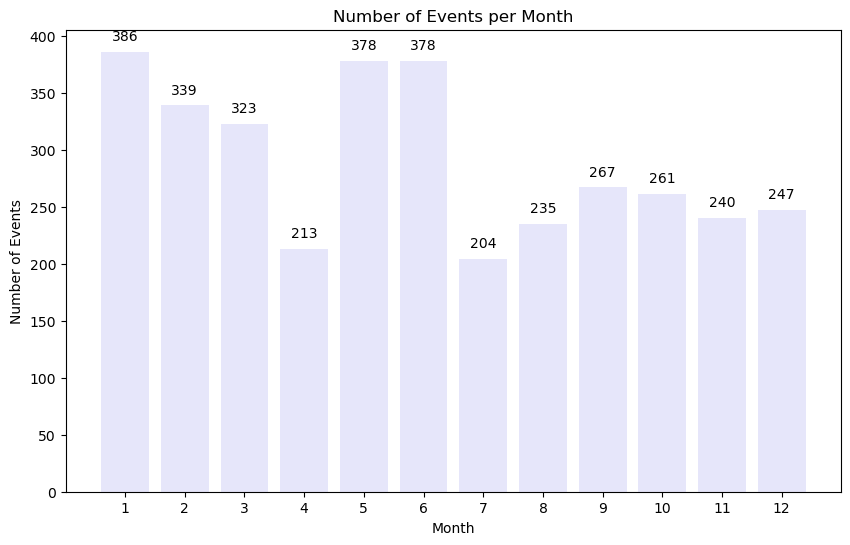

In [235]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the Date column to a datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract Date
data['Month'] = data['Date'].dt.month

# Group data by month and count the number of events each month
events_by_month = data['Month'].value_counts().sort_index()

# Plotting the number of events per month with data labels
plt.figure(figsize=(10, 6))
plt.bar(events_by_month.index, events_by_month.values, tick_label=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], color='lavender')
plt.title("Number of Events per Month")
plt.xlabel("Month")
plt.ylabel("Number of Events")
for index, value in enumerate(events_by_month.values):
    plt.text(events_by_month.index[index], value + 10, str(value), ha='center')
plt.show()
